LIN 371 UT Austin :: Jessy Li

Code and text from https://beckernick.github.io/logistic-regression-from-scratch/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## preparing data

Let's sample some data to categorize!

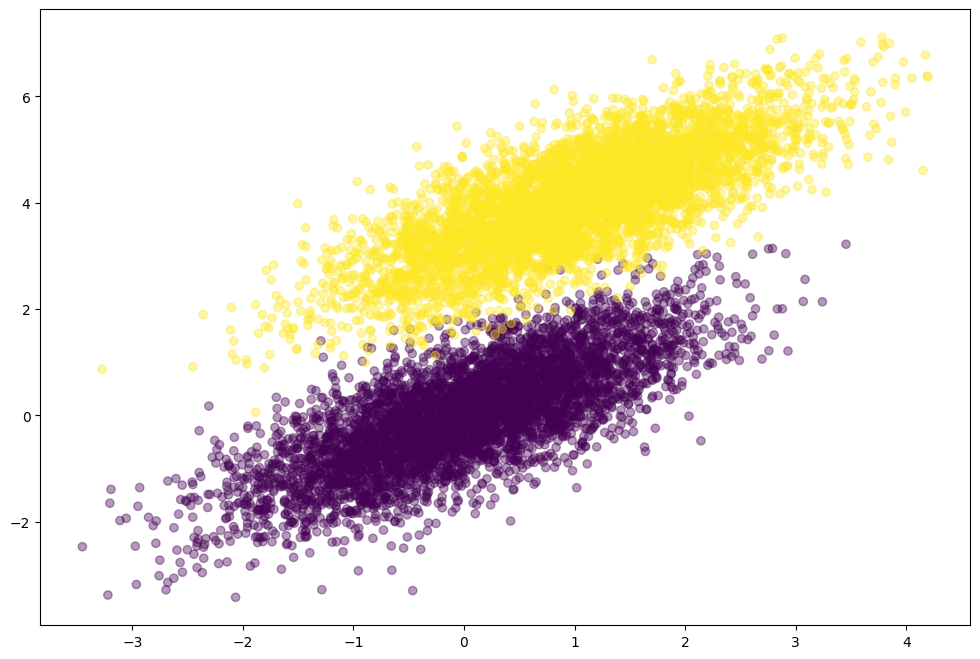

In [2]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

## let's see how it looks!
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

## Implement Logistic Regression

In [7]:
## Let's first get the sigmoid function out of the way!
def sigmoid(scores): #scores is w*x
    return 1/(1 + np.exp(-scores))

## Formulating the MLE
def log_likelihood(features, target, weights):
    ## sum (ylogp+(1-y)log(1-p))=sum (y*wx)+sum(-log(1+e^wx)))
    scores = np.dot(features, weights)
    ll = np.sum(target * scores - np.log(1+np.exp(scores)))
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = True):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    ## gradient descent
    for step in range(num_steps):
        # Get predictions
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights ## one weight for each feature: w_1*x_1+w_2*x_2+w_0*1

In [10]:
print(simulated_separableish_features.shape)

(10000, 2)


In [8]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 100000, learning_rate = 5e-5)

print(weights)

-4346.264779152365
-148.70672276805357
-142.9649362310784
-141.54530307157367
-141.060319659308
-140.87031585891606
-140.79025912753812
-140.7550500226991
-140.73914503180953
-140.73183498915876
[-14.0178565   -5.03280465   8.24664683]


## Examine the model

In [14]:
## printing the accuracy
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                            simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)

preds = np.round(sigmoid(final_scores))

print('Accuracy', (preds == simulated_labels).sum().astype(float) / len(preds))


Accuracy 0.9948


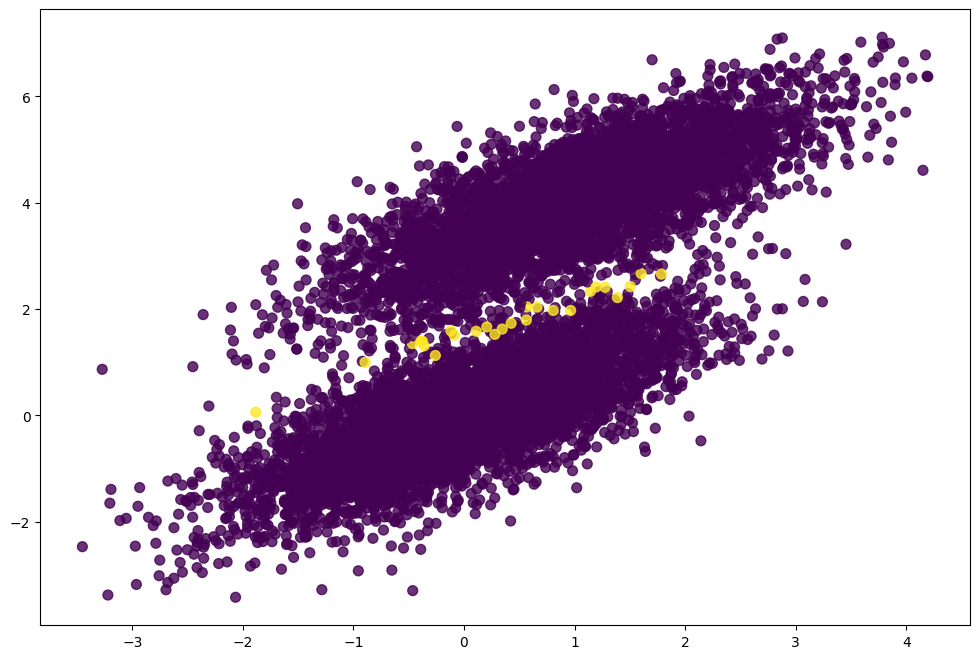

In [15]:
## plotting! Yellow dots are incorrect predictions, the rest are correct!

plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)